# Pharmaceutical Clinical Mice Trials - Matplotlib & Pandas

## General Observations

1) Capomulin and Ramicane both had the lowest overall average tumor volumes across all datapoints, as well as relatively low variance, standard deviation, and SEM - suggesting that the results for those two regimens were more positive and more consistent than the other regimens studied.

2) Looking at the tumor growth in one of the Capomulin mice (Mouse t565), the results indicate that Capomulin does inhibit tumor growth, but only to a certain point (in this case, between time points 10 and 30). After that, the effectiveness of the drug seems to plateau tumor growth starts to increase again, even with the regimen.

3) Looking at the data for the Capomulin mice, there is a positive correleation between the each mouse's weight and the volume of the tumor, meaning the larger the mouse, the larger the tumor.

## Dependancies & Starter Code

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set()

mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_study_dataset = pd.merge(mouse_metadata, study_results, how="left", on = ["Mouse ID", "Mouse ID"])

## Summary Table: Tumor Growth by Volume (mm3)

In [ ]:
df = mouse_study_dataset.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}).round(2)
summary_stats = df.rename(columns={'mean':'Tumor Volume Mean', 'median':'Tumor Volume Median', 'var':'Tumor Volume Variance','std':'Tumor Volume Std Dev', 'sem':'Tumor Volume SEM'})
summary_stats

## Number of datapoints per drug regimen

In [ ]:
mouse_study_grouped = mouse_study_dataset.groupby(["Drug Regimen"])

# CREATE VARIABLE FOR X-AXIS.......................................................................
drug_regimen_sorted = mouse_study_dataset.sort_values("Drug Regimen")
drug_regimen = drug_regimen_sorted["Drug Regimen"].unique()
datapoints = mouse_study_grouped["Tumor Volume (mm3)"].count()
datapoints

In [ ]:
# PLOT BAR GRAPH..................................................................................
plt.figure(figsize=(10,5))
plt.bar(drug_regimen, datapoints, color=sb.hls_palette(10, l=.5))
plt.title("Datapoints per Drug Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")
plt.xticks(rotation=45)
plt.show()

## Promising Regimens

### 1) Capomulin

In [ ]:
#CALCULATE DATA SETS & FINAL TIMEPOINT FOR THE REGIMEN.........................................................
Capomulin_by_MouseID = mouse_study_dataset.loc[mouse_study_dataset["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID")
Capomulin_final_timepoint = Capomulin_by_MouseID[[ "Timepoint"]].max()

#REMERGE DATA & INDEX TO IDENTIFY THE FINAL TUMOR VOLUME FOR EACH MOUSE IN THE REGIMEN.........................
Capomulin_remerge_indexed = pd.merge(Capomulin_final_timepoint, mouse_study_dataset, how="left", on = ["Mouse ID", "Timepoint"]).set_index(['Mouse ID'])

# SEPARATE OUT FINAL VOLUME FOR THE REGIMEN....................................................................
Capomulin_final_volume = Capomulin_remerge_indexed["Tumor Volume (mm3)"]

# CALCULATE QUARTILES AND IQR FOR THE REGIMEN..................................................................
Capomulin_quartiles = Capomulin_final_volume.quantile([.25,.5,.75])
Caplowerq = Capomulin_quartiles[0.25]
Capupperq = Capomulin_quartiles[0.75]
Capiqr = Capupperq-Caplowerq
Cap_lower_bound = Caplowerq - (1.5*Capiqr)
Cap_upper_bound = Capupperq + (1.5*Capiqr)

### 2) Ramicane

In [ ]:
Ramicane_by_MouseID = mouse_study_dataset.loc[mouse_study_dataset["Drug Regimen"] == "Ramicane",:].groupby("Mouse ID")
Ramicane_final_timepoint = Ramicane_by_MouseID[[ "Timepoint"]].max()

Ramicane_remerge_indexed = pd.merge(Ramicane_final_timepoint, mouse_study_dataset, how="left", on = ["Mouse ID", "Timepoint"]).set_index(['Mouse ID'])
Ramicane_final_volume = Ramicane_remerge_indexed["Tumor Volume (mm3)"]

Ramicane_quartiles = Ramicane_final_volume.quantile([.25,.5,.75])
Ramlowerq = Ramicane_quartiles[0.25]
Ramupperq = Ramicane_quartiles[0.75]
Ramiqr = Ramupperq-Ramlowerq
Ram_lower_bound = Ramlowerq - (1.5*Ramiqr)
Ram_upper_bound = Ramupperq + (1.5*Ramiqr)

### 3) Infubinol

In [ ]:
Infubinol_by_MouseID = mouse_study_dataset.loc[mouse_study_dataset["Drug Regimen"] == "Infubinol",:].groupby("Mouse ID")
Infubinol_final_timepoint = Infubinol_by_MouseID[[ "Timepoint"]].max()

Infubinol_remerge_indexed = pd.merge(Infubinol_final_timepoint, mouse_study_dataset, how="left", on = ["Mouse ID", "Timepoint"]).set_index(['Mouse ID'])
Infubinol_final_volume = Infubinol_remerge_indexed["Tumor Volume (mm3)"]

Infubinol_quartiles = Infubinol_final_volume.quantile([.25,.5,.75])
Inflowerq = Infubinol_quartiles[0.25]
Infupperq = Infubinol_quartiles[0.75]
Infiqr = Infupperq-Inflowerq
Inf_lower_bound = Inflowerq - (1.5*Infiqr)
Inf_upper_bound = Infupperq + (1.5*Infiqr)

### 4) Ceftamin

In [ ]:
Ceftamin_by_MouseID = mouse_study_dataset.loc[mouse_study_dataset["Drug Regimen"] == "Ceftamin",:].groupby("Mouse ID")
Ceftamin_final_timepoint = Ceftamin_by_MouseID[[ "Timepoint"]].max()

Ceftamin_remerge_indexed = pd.merge(Ceftamin_final_timepoint, mouse_study_dataset, how="left", on = ["Mouse ID", "Timepoint"]).set_index(['Mouse ID'])
Ceftamin_final_volume = Ceftamin_remerge_indexed["Tumor Volume (mm3)"]

Ceftamin_quartiles = Ceftamin_final_volume.quantile([.25,.5,.75])
Ceflowerq = Ceftamin_quartiles[0.25]
Cefupperq = Ceftamin_quartiles[0.75]
Cefiqr = Cefupperq-Ceflowerq
Cef_lower_bound = Ceflowerq - (1.5*Cefiqr)
Cef_upper_bound = Cefupperq + (1.5*Cefiqr)

In [ ]:
# PRINT QUARTILES AND IQR FOR EACH REGIMEN...................................................................
print(f"Capomulin Lower Quartile: {round(Caplowerq,2)}")
print(f"Capomulin Upper Quartile: {round(Capupperq,2)}")
print(f"Capomulin IQR: {round(Capiqr,2)}")
print(f"Outliers: below {round(Cap_lower_bound,2)} or above {round(Cap_upper_bound,2)}")
print("---------------------------------------------------")

print(f"Ramicane Lower Quartile: {round(Ramlowerq,2)}")
print(f"Ramicane Upper Quartile: {round(Ramupperq,2)}")
print(f"Ramicane IQR: {round(Ramiqr,2)}")
print(f"Outliers: below {round(Ram_lower_bound,2)} or above {round(Ram_upper_bound,2)}")
print("---------------------------------------------------")

print(f"Infubinol Lower Quartile: {round(Inflowerq,2)}")
print(f"Infubinol Upper Quartile: {round(Infupperq,2)}")
print(f"Infubinol IQR: {round(Infiqr,2)}")
print(f"Outliers: below {round(Inf_lower_bound,2)} or above {round(Inf_upper_bound,2)}")
print("---------------------------------------------------")

print(f"Ceftamin Lower Quartile: {round(Ceflowerq,2)}")
print(f"Ceftamin Upper Quartile: {round(Cefupperq,2)}")
print(f"Ceftamin IQR: {round(Cefiqr,2)}")
print(f"Outliers: below {round(Cef_lower_bound,2)} or above {round(Cef_upper_bound,2)}")

## Outliers:
Based on the IQRs, if there are any outliers in the data, they are most likley to be in the Infubinol or Ceftamin data groups.  Ceftamin has the widest IQR, with Infubinol being the second highest.  However this could be the result of a wider variance in the datapoints, instead of there being an outlier skewing the data. looking back at the Summary Data table created for Volume Growth, Infubinol has the widest variance between the 4 regimens being compared, with Ceftamn coming in second. Additionally, Infubinol also has the widest standard deviation of the four. 

A look at the boxplots (generated below) confirms that it is in fact Infubinal that has an outlier within its dataset. 

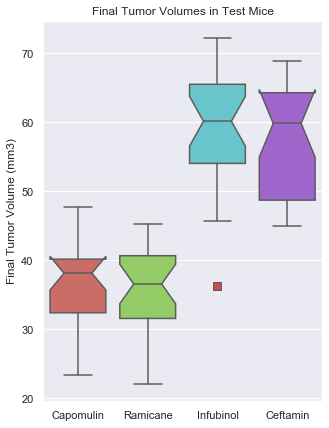

In [108]:
Four_regimen_boxplot = [Capomulin_final_volume, Ramicane_final_volume, Infubinol_final_volume, Ceftamin_final_volume]
red_square = dict(markerfacecolor='r', marker='s', markersize='8')

fig1, ax1 = plt.subplots(figsize=(5,7))
bplot = sb.boxplot(xticks, Four_regimen_boxplot, notch=True, flierprops=red_square)

# colors = sb.color_palette("hls", 4)
# sb.set_palette(sb.color_palette(colors))

xticks=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ax1.set_title('Final Tumor Volumes in Test Mice')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()